# Learning Plots

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [10]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()


,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [11]:
#group by genre and calculate the average total stream
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending = False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

# Bar Plots Video

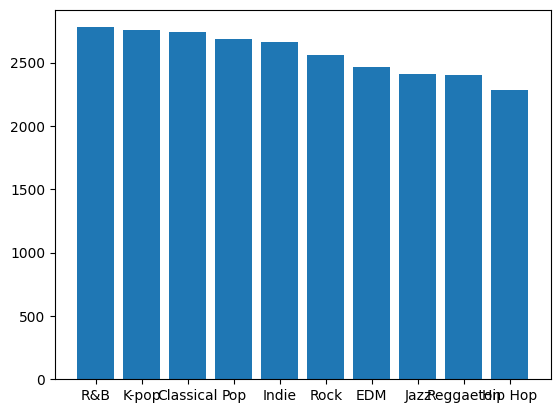

In [12]:
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

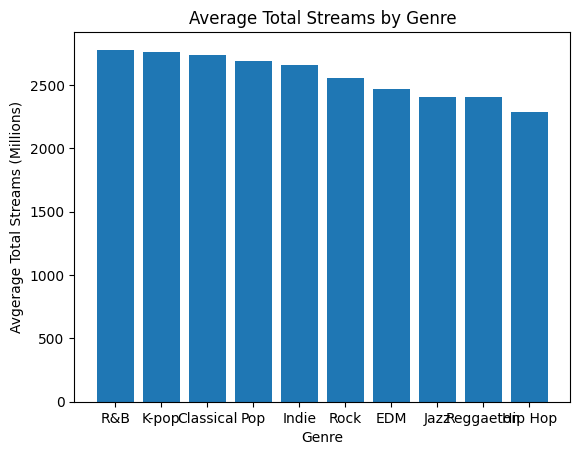

In [13]:
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel("Genre")
plt.ylabel("Avgerage Total Streams (Millions)")
plt.title("Average Total Streams by Genre")

plt.show()

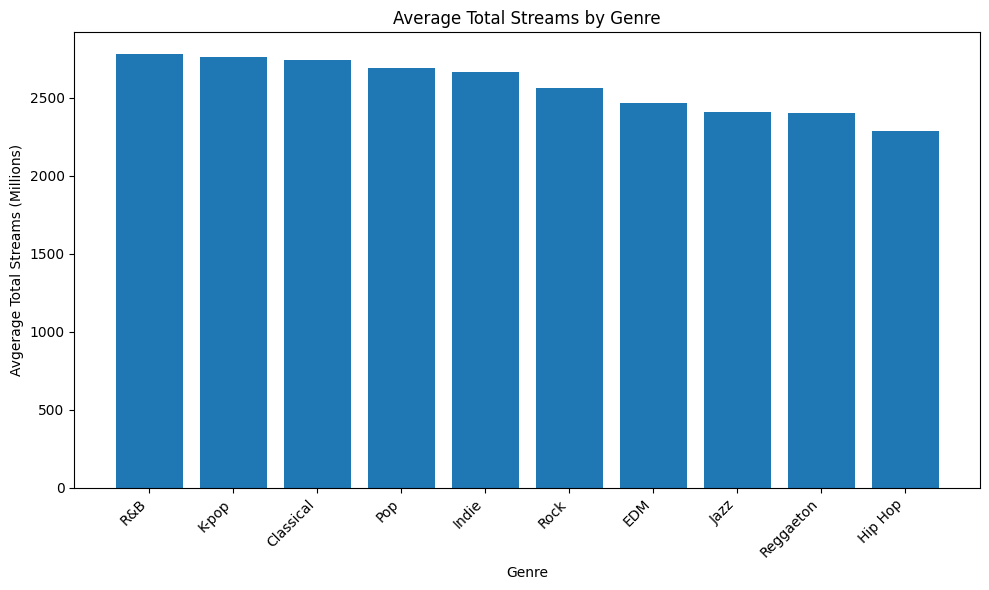

In [88]:
plt.figure(figsize=(10,6))

plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel("Genre")
plt.ylabel("Avgerage Total Streams (Millions)")
plt.title("Average Total Streams by Genre")

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()

plt.savefig("../plots/AvgTotalStreamsbyGenreBar.png")

plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Genre")
plt.ylabel("Avgerage Total Streams (Millions)")
plt.title("Average Total Streams by Genre")

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

In [ ]:
avg_artist_streams=spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending = False)
avg_artist_streams

In [ ]:
plt.figure(figsize=(10,6))
colors = ["#7b92c9"]*len(avg_artist_streams)
max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position]="#f030ad"
#plt.bar(avg_streams.index, avg_streams.values, color = "pink", width = .8)
plt.bar(avg_streams.index, avg_streams.values, color = colors, width = .8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Avgerage Total Streams (Millions)")
plt.title("Average Total Streams by Artist")

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

special_artist = "Ariana Grande"
colors = ["#fb92c9" if artist == special_artist else "gray" for artist in avg_artist_streams.index]

plt.bar(avg_streams.index, avg_streams.values, color = colors, width = .9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Avgerage Total Streams (Millions)")
plt.title("Ariana Grande Ranks 2nd in Total Average Streams")

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

# Scatter Plots   

In [15]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

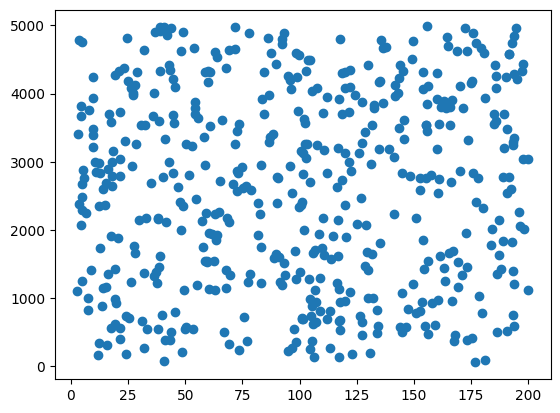

In [16]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])
plt.show()

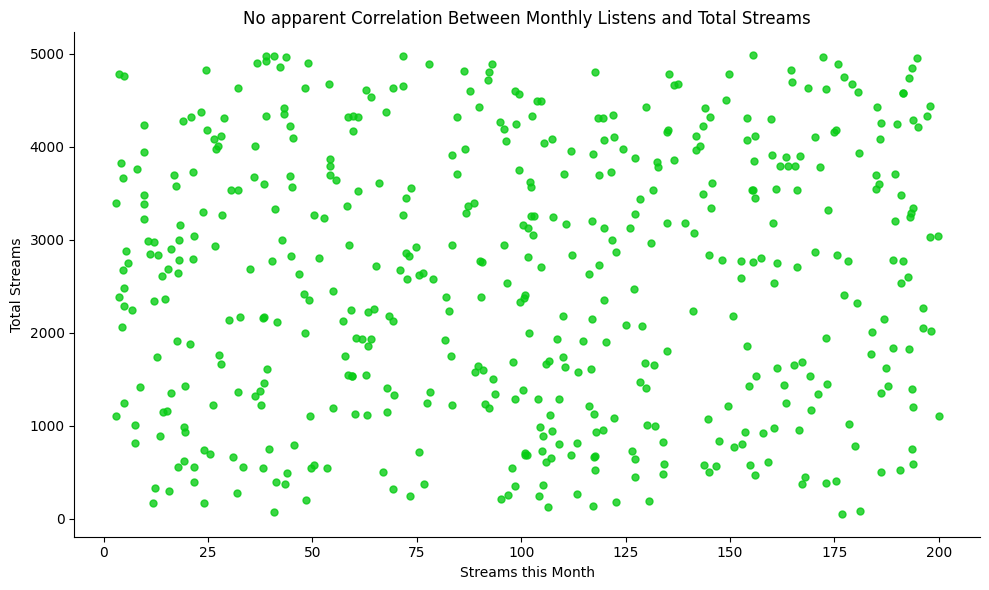

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(
  spotify_df["Streams Last 30 Days (Millions)"], 
  spotify_df["Total Streams (Millions)"],
  color = "#08cc15",
  alpha = 0.8,
  s = 25)

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No apparent Correlation Between Monthly Listens and Total Streams")

ax=plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

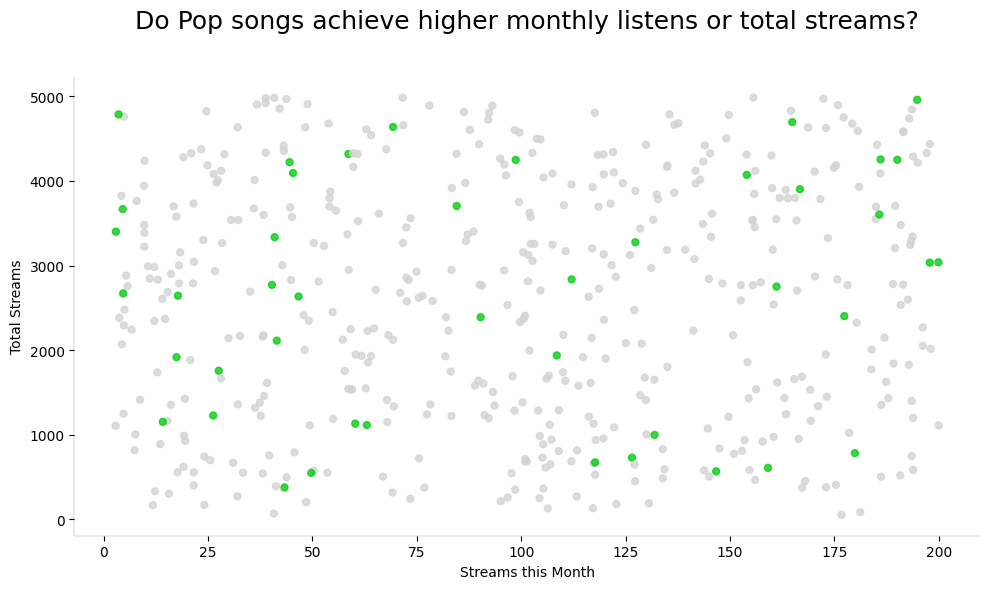

In [89]:
plt.figure(figsize=(10,6))

featured_genre = "Pop"
colors = ["#08cc15" if genre == featured_genre else "#d1d5d1" for genre in spotify_df["Genre"]]

plt.scatter(
  spotify_df["Streams Last 30 Days (Millions)"], 
  spotify_df["Total Streams (Millions)"],
  color = colors,
  alpha = 0.8,
  s = 25)

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
#plt.title("No apparent Correlation Between Monthly Listens and Total Streams")

ax=plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Do Pop songs achieve higher monthly listens or total streams?", fontsize = 18, pad = 35)

for spine in ax.spines.values():
  spine.set_linewidth(.25)
  spine.set_alpha(.5)

plt.tight_layout()

plt.savefig("../plots/ScatterPlot.png")

plt.show()

# Line Charts

In [29]:
yearly_avg = spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)
yearly_avg

Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

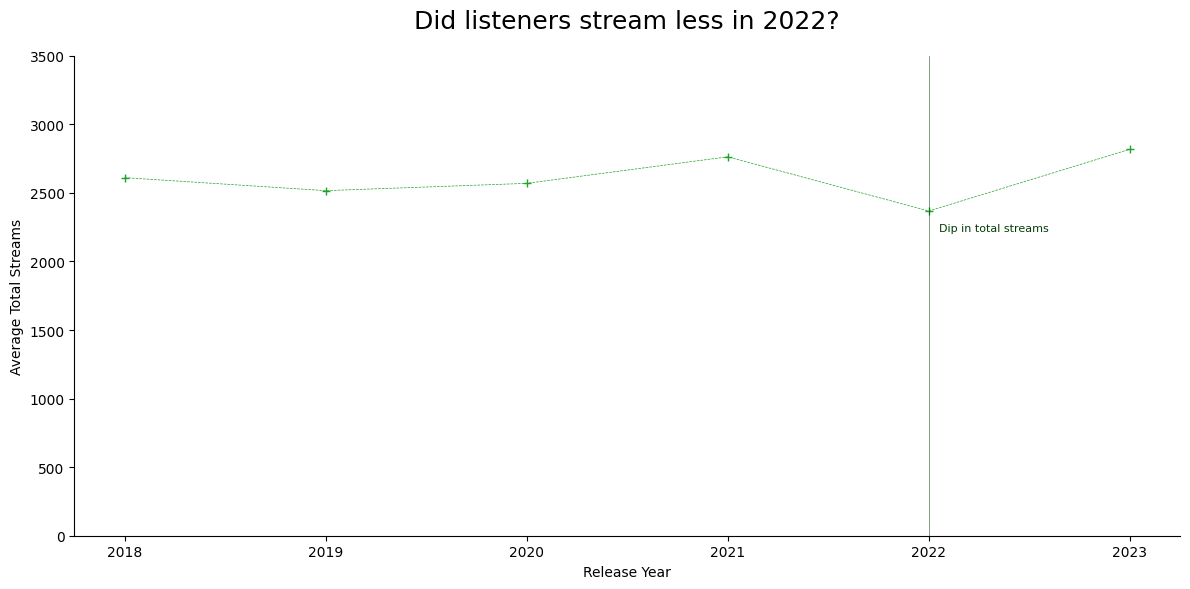

In [90]:
plt.figure(figsize=(12,6))
plt.plot(
  yearly_avg.index, 
  yearly_avg.values,
  marker = "+",
  linestyle = "--" ,
  color = "#20a32b",
  linewidth = .5)

plt.xlabel("Release Year")
plt.ylabel("Average Total Streams")
plt.title("Did listeners stream less in 2022?", fontsize = 18, pad = 20)

ax=plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.axvline(
  2022,
  color = "#063b0a",
  linewidth = .5,
  alpha = .7)

ax.text(
  2022+.05,
  2225,
  "Dip in total streams",
  color = "#063b0a",
  fontsize = 8
)

plt.ylim(0, 3500)

plt.tight_layout()
plt.savefig("../plots/ListenerStreamin2022Line.png")

plt.show()
           

# Pie Charts

In [47]:
category = "Platform Type"
values = "Total Streams (Millions)"

platform_totals = spotify_df.groupby(category)[values].sum()
platform_totals

Platform Type
Free       638685.97
Premium    651891.07
Name: Total Streams (Millions), dtype: float64

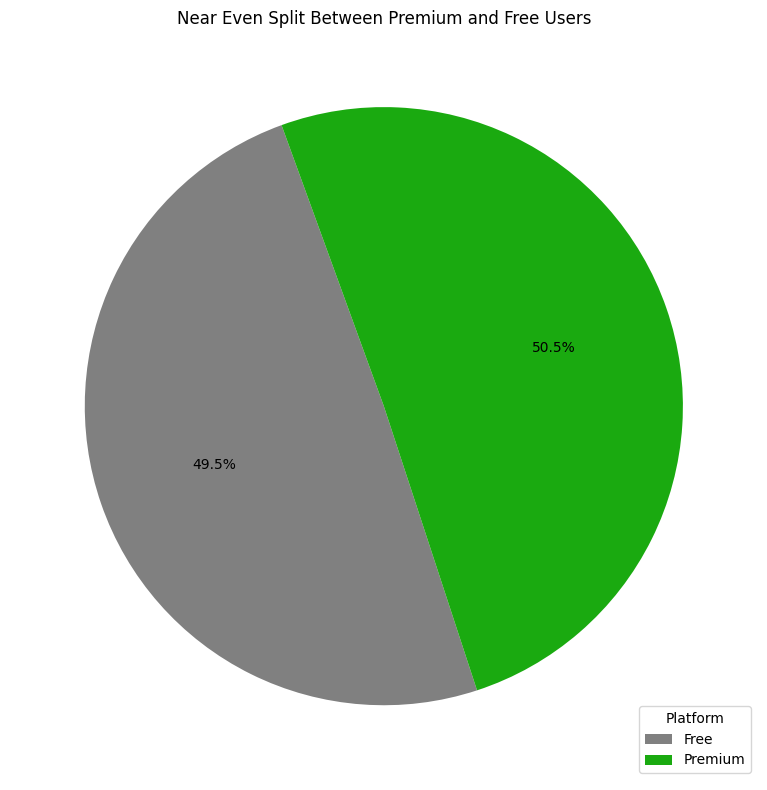

In [51]:
plt.figure(figsize=(8,8))

plt.pie(platform_totals,
        labels = None,
        startangle = 110,
        colors = ["gray", "#1aaa10"],
        autopct = "%1.1f%%")
plt.title("Near Even Split Between Premium and Free Users")

plt.legend(
  labels = platform_totals.index,
  loc = "lower right",
  title = "Platform"
)

plt.tight_layout()
plt.show()

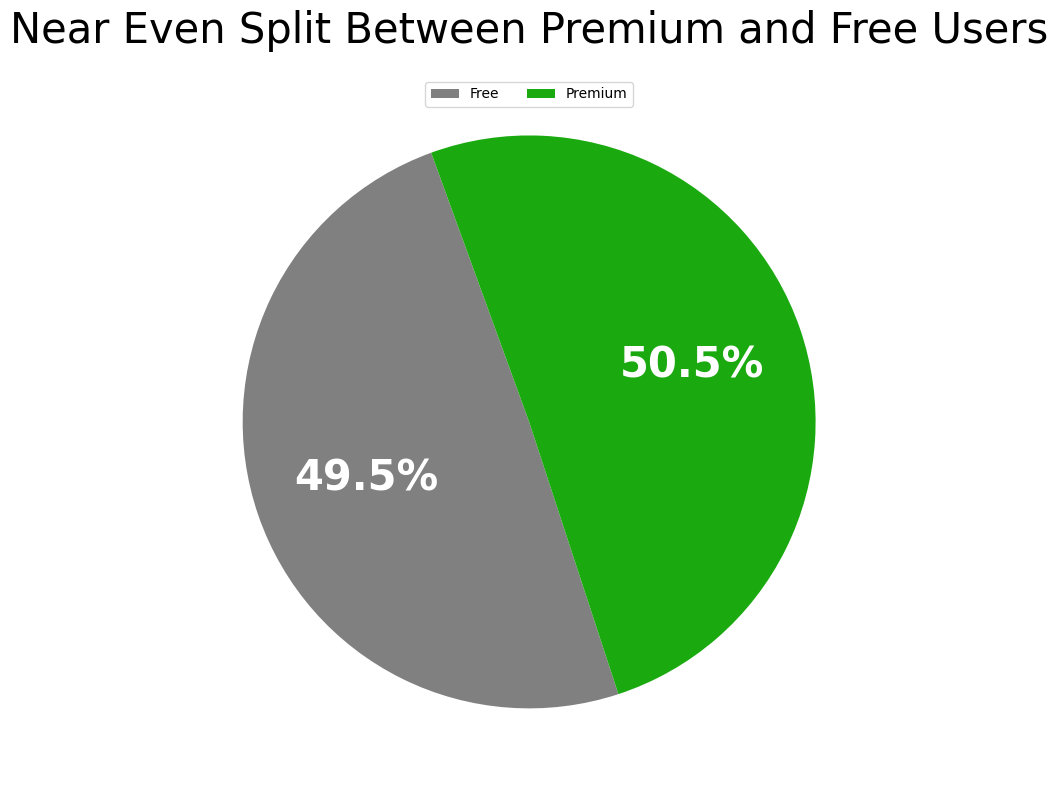

In [91]:
fig, ax = plt.subplots(figsize = (8,8))

wedges, texts, autotexts = ax.pie(
  platform_totals,
  #labels = None,
  startangle = 110,
  colors = ["gray", "#1aaa10"],
  autopct = "%1.1f%%")

ax.set_title(
"Near Even Split Between Premium and Free Users",
fontsize = 30,
pad = 15,
loc = "center"  
)

for autotext in autotexts:
  autotext.set_fontsize(30)
  autotext.set_color("white")
  autotext.set_weight("bold")

ax.legend(
  wedges,
  platform_totals.index,
  loc = "lower center",
  bbox_to_anchor = (.5, .93),
  ncol = 2
)

#plt.title("Near Even Split Between Premium and Free Users")

#plt.legend(
 # labels = platform_totals.index,
 # loc = "lower right",
 # title = "Platform"
#)

plt.tight_layout()

plt.savefig("../plots/PremiumFreeUsersPie.png")

plt.show()

#Histogram

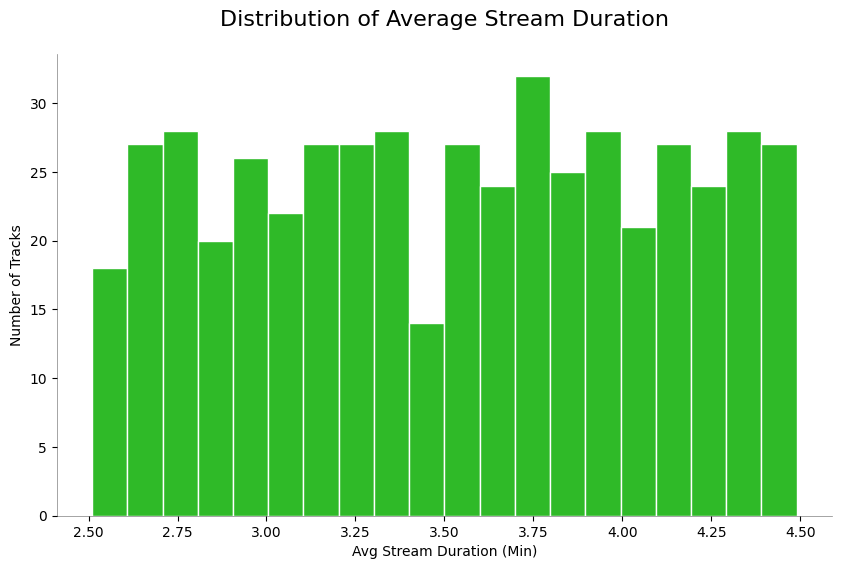

In [92]:
plt.figure(figsize=(10,6))

plt.hist(
  spotify_df["Avg Stream Duration (Min)"],
  bins = 20,
  color = "#2fba28",
  #alpha = .9,
  edgecolor = "white"
)

plt.xlabel("Avg Stream Duration (Min)")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Average Stream Duration", fontsize = 16, pad = 20)


ax = plt.gca()
for spine in ax.spines.values():
  spine.set_linewidth(.5)
  spine.set_alpha(.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig("../plots/AvgStreamDurationHistogram.png")
plt.show()

# Boxplots

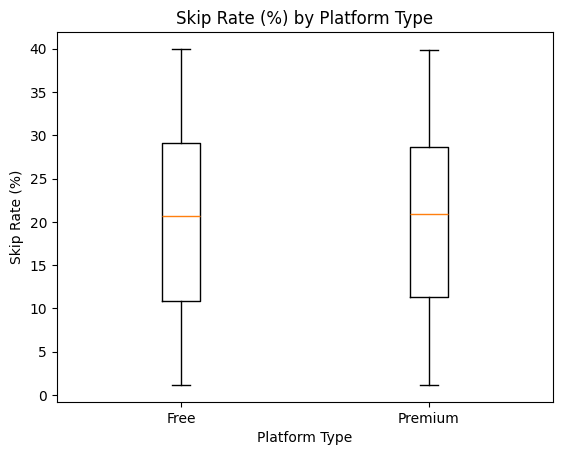

In [93]:
plt.boxplot(
  [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],
   spotify_df[spotify_df["Platform Type"]=="Premium"]["Skip Rate (%)"]]
)

plt.xticks([1,2], ["Free", "Premium"])

plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rate (%) by Platform Type")

plt.savefig("../plots/SkipRateBoxPlot.png")

plt.show()

# Heatmaps

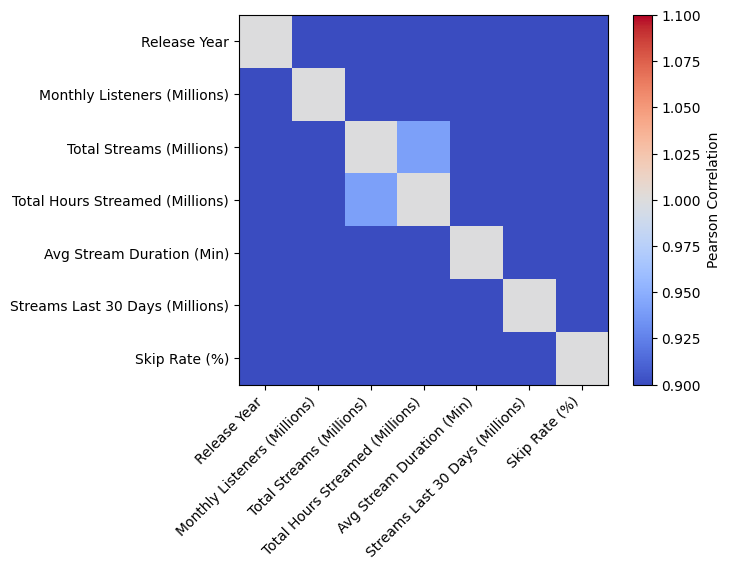

In [94]:
numeric_spotify_df = spotify_df.select_dtypes(include=[np.number])
#numeric_spotify_df.head()

corr = numeric_spotify_df.corr()

im = plt.imshow(corr, vmin = 1, vmax = 1, cmap = "coolwarm")
plt.colorbar(im, label = "Pearson Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45, ha = "right")
plt.yticks(range(len(corr.columns)), corr.columns)

plt.savefig("../plots/Heat.png")

plt.show()

# Count Plots

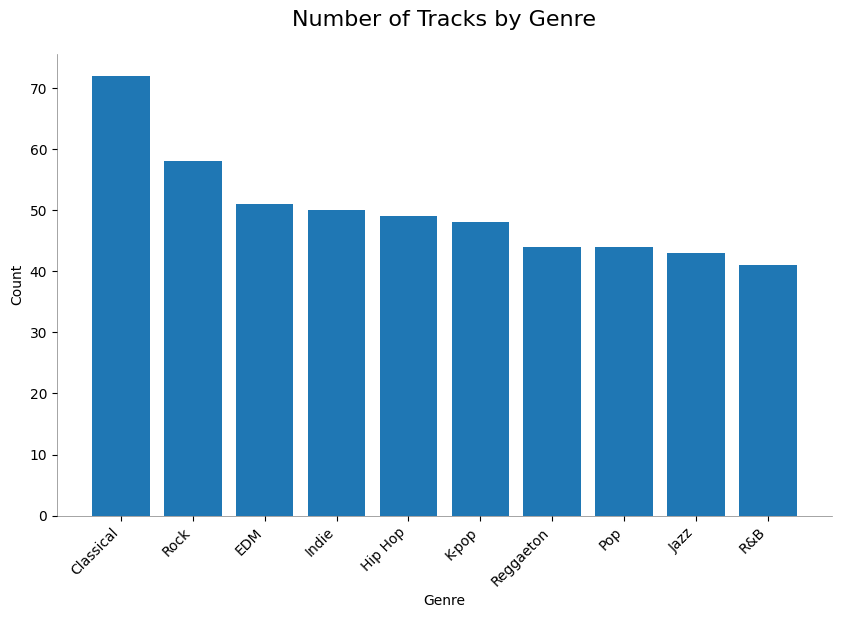

In [95]:
plt.figure(figsize=(10,6))

genre_counts = spotify_df["Genre"].value_counts().sort_values(ascending=False)
genre_counts

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation = 45, ha = "right")

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of Tracks by Genre", fontsize = 16, pad = 20)

ax = plt.gca()
for spine in ax.spines.values():
  spine.set_linewidth(.5)
  spine.set_alpha(.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.savefig("../plots/NumTracksbyGenreCount.png")
plt.show()